# Workshop 3

After you learn about _regular expressions_ and _data manipulation_, it is momment to validate how many do you learn about __data visualization__.  

## Problem 1

The data for this problem comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location, and this is stored in the file: [assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv](assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv).

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:

- __id__: station identification code
- __date__: date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
- __element__: indicator of element type
    - _TMAX_: Maximum temperature (tenths of degrees F)
    - _TMIN_: Minimum temperature (tenths of degrees F)
- __value__: data value for element (tenths of degrees F)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

Your final output should looks like next one:

![](chris_sketch.png)

### Step 1.1

Load the dataset and transform the data into _Celsius_ (refer to documentation). Then extract all of the rows which have minimum or maximum temperatures, each one in a separate dataframe.

__Hint: when I did this step I had two DataFrame objects, each with ~80,000 entries in it__

In [1]:
import pandas as pd
from pathlib import Path

def fahrenheit_to_celsius(fahrenheit):
    """
    Convert temperature from Fahrenheit to Celsius.

    Parameters:
    fahrenheit (float): Temperature in Fahrenheit.

    Returns:
    float: Temperature in Celsius.
    """
    return (fahrenheit - 32) * 5.0 / 9.0

# Define the file path
file_path = Path('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Load the dataset
temperatures_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
temperatures_df['Date'] = pd.to_datetime(temperatures_df['Date'])

# Filter out rows with Data_Value equal to 0 (as per documentation)
temperatures_df = temperatures_df[temperatures_df['Data_Value'] != 0]

# Convert 'Data_Value' from Fahrenheit to Celsius
temperatures_df['Data_Value'] = temperatures_df['Data_Value'].apply(fahrenheit_to_celsius)

# Separate the data into two DataFrames for TMIN and TMAX
temperature_min_df = temperatures_df[temperatures_df['Element'] == 'TMIN']
temperature_max_df = temperatures_df[temperatures_df['Element'] == 'TMAX']

# Display the first few rows of the max temperature DataFrame
temperature_max_df.head()


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,-5.555556
2,USC00200032,2008-05-26,TMAX,136.666667
3,USC00205563,2005-11-11,TMAX,59.444444
4,USC00200230,2014-02-27,TMAX,-76.666667
5,USW00014833,2010-10-01,TMAX,90.000000


In [ ]:
# space for proffessor's tests


### Step 1.2

In order to visualize the data we would _plot_ the __min__ and _max_ data for each day of the year between the years $2005$ and $2014$ across all weather stations. But we also need to find out _when_ the __min__ or __max__ temperature in $2015$ falls below the min or rises above the max for the _previous decade_.

If you did _Step 1.1_ you have _two Series_ objects with _min_ and _max_ times for the years $2005$ through $2015$. You can use Pandas `groupby` to create _max_ and _min_ temperature _Series_ objects across all weather stations for each day of these years, and you can deal with the records for _February 29_ (the leap year) by dropping them.

__Hint: When I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [4]:
import pandas as pd

def remove_leap_days(df):
    """
    Remove February 29th from the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame with a 'Date' column.

    Returns:
    pd.DataFrame: DataFrame without February 29th.
    """
    return df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Group and aggregate the maximum temperatures by date
temperature_max_per_day_df = (
    temperature_max_df.groupby('Date')['Data_Value']
    .max()
    .reset_index()
)
temperature_max_per_day_df = remove_leap_days(temperature_max_per_day_df)

# Group and aggregate the minimum temperatures by date
temperature_min_per_day_df = (
    temperature_min_df.groupby('Date')['Data_Value']
    .min()
    .reset_index()
)
temperature_min_per_day_df = remove_leap_days(temperature_min_per_day_df)

# Display the first few rows of the DataFrames
print(temperature_max_per_day_df.head())
print(temperature_min_per_day_df.head())



        Date  Data_Value
0 2005-01-01   68.888889
1 2005-01-02   59.444444
2 2005-01-03   56.111111
3 2005-01-04    3.888889
4 2005-01-05    0.555556
        Date  Data_Value
0 2005-01-01  -48.888889
1 2005-01-02  -48.888889
2 2005-01-03  -14.444444
3 2005-01-04  -39.444444
4 2005-01-05  -70.000000


In [ ]:
# space for proffessor's tests

### Step 1.3
Now that you have grouped the _daily_ __max__ and __min__ temperatures for each day of the years $2005$ through $2015$, you can separate out the data for $2015$. Then you can use the Pandas `groupby` function to find the __max__ and __min__ of the temperature data for each __day of the year__ for the $2005-2014$ data.

__Hint: At the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [5]:
import pandas as pd

def remove_leap_days(df):
    """
    Remove February 29th from the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame with a 'Date' column.

    Returns:
    pd.DataFrame: DataFrame without February 29th.
    """
    return df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

def get_max_min_by_day(df, year, value_col='Data_Value'):
    """
    Group and aggregate the temperature values by day of the year for a given year.

    Parameters:
    df (pd.DataFrame): DataFrame with 'Date' and temperature value columns.
    year (int): Year to filter the DataFrame.
    value_col (str): Column name of the temperature values.

    Returns:
    pd.DataFrame: DataFrame with aggregated max/min temperature values by day of the year.
    """
    df_year = df[df['Date'].dt.year == year]
    return df_year.groupby(df_year['Date'].dt.strftime('%m-%d'))[value_col].agg(['max', 'min']).reset_index()

# Separate the data for 2005-2014 and 2015
last_decade_max_df = temperature_max_per_day_df[temperature_max_per_day_df['Date'].dt.year != 2015]
last_decade_min_df = temperature_min_per_day_df[temperature_min_per_day_df['Date'].dt.year != 2015]

# Group and aggregate the data by day of the year for 2005-2014
temperature_max_day_year_df = last_decade_max_df.groupby(last_decade_max_df['Date'].dt.strftime('%m-%d'))['Data_Value'].max().reset_index()
temperature_min_day_year_df = last_decade_min_df.groupby(last_decade_min_df['Date'].dt.strftime('%m-%d'))['Data_Value'].min().reset_index()

# Get the data for 2015
just_2015_max_df = temperature_max_per_day_df[temperature_max_per_day_df['Date'].dt.year == 2015]
just_2015_min_df = temperature_min_per_day_df[temperature_min_per_day_df['Date'].dt.year == 2015]

# Group and aggregate the data by day of the year for 2015
temperature_max_per_day_2015_df = just_2015_max_df.groupby(just_2015_max_df['Date'].dt.strftime('%m-%d'))['Data_Value'].max().reset_index()
temperature_min_per_day_2015_df = just_2015_min_df.groupby(just_2015_min_df['Date'].dt.strftime('%m-%d'))['Data_Value'].min().reset_index()

# Find days in 2015 where the minimum temperature was below the previous record
min_below = temperature_min_per_day_2015_df[temperature_min_per_day_2015_df['Data_Value'] < temperature_min_day_year_df['Data_Value']]

# Find days in 2015 where the maximum temperature was above the previous record
max_above = temperature_max_per_day_2015_df[temperature_max_per_day_2015_df['Data_Value'] > temperature_max_day_year_df['Data_Value']]

# Display the results
print("Days in 2015 where minimum temperature was below the previous record:")
print(min_below)
print("Days in 2015 where maximum temperature was above the previous record:")
print(max_above)


Days in 2015 where minimum temperature was below the previous record:
      Date  Data_Value
4    01-05 -103.888889
10   01-11 -128.888889
33   02-03 -150.000000
44   02-14 -150.555556
45   02-15 -162.222222
46   02-16 -181.111111
47   02-17 -168.888889
49   02-19 -162.222222
50   02-20 -208.333333
51   02-21 -196.666667
53   02-23 -166.111111
54   02-24 -168.888889
55   02-25 -138.333333
56   02-26 -137.777778
57   02-27 -177.777778
58   02-28 -168.888889
63   03-05 -140.555556
64   03-06 -159.444444
65   03-07 -141.111111
86   03-28  -85.555556
87   03-29  -79.444444
88   03-30  -85.555556
113  04-24  -57.222222
114  04-25  -45.555556
139  05-20  -11.666667
183  07-03   22.222222
239  08-28   13.333333
289  10-17  -48.333333
290  10-18  -48.333333
291  10-19  -51.666667
292  10-20  -39.444444
313  11-10  -42.222222
Days in 2015 where maximum temperature was above the previous record:
      Date  Data_Value
39   02-09   28.333333
106  04-17  136.666667
126  05-07  152.222222
127  05-0

In [ ]:
# space for proffessor's tests

### Step 1.4

Now it's time to plot! You need to explore _matplotlib_ in order to plot line graphs of the _min_ and _max_ temperatures for the years $2005$ through $2014$ and to scatter plot __only__ the daily $2015$ temperatures that exceeded those values.

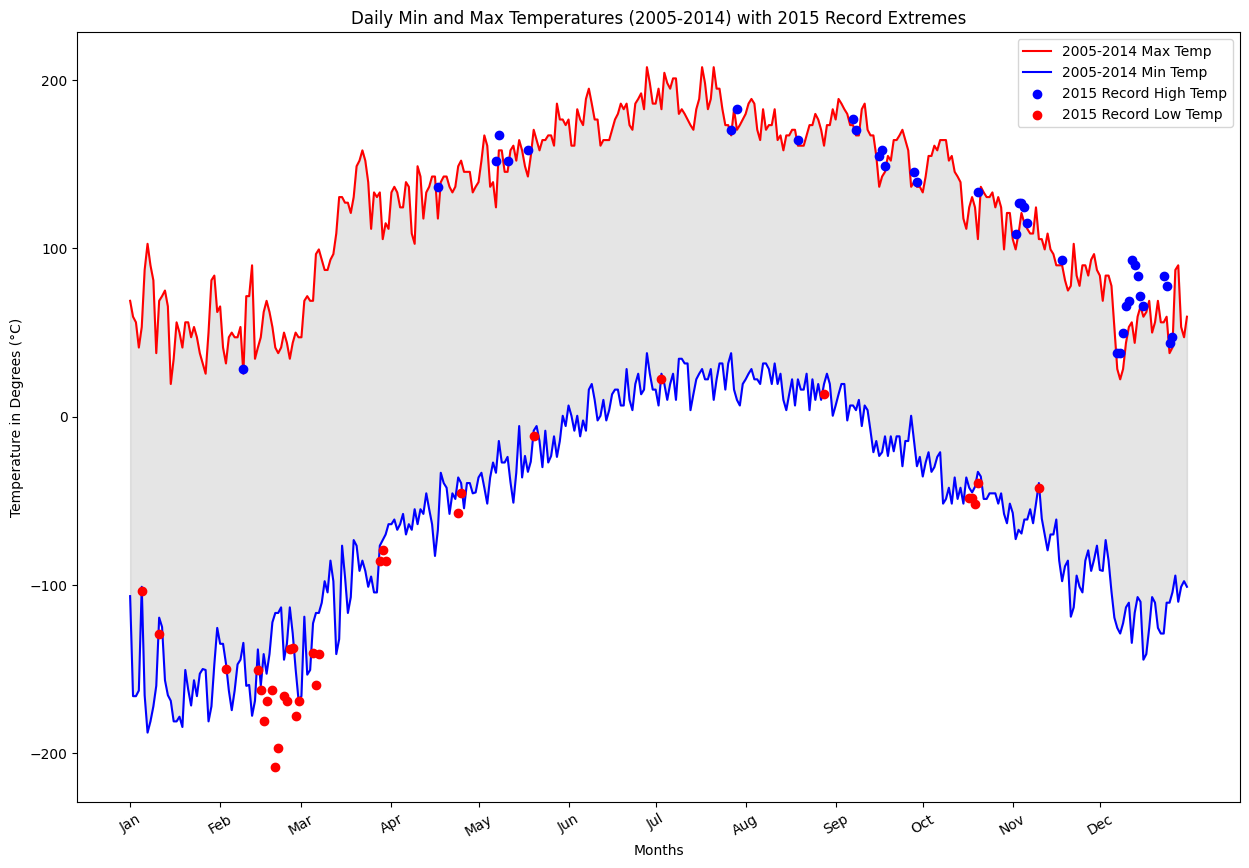

In [7]:
import matplotlib.pyplot as plt
from calendar import month_abbr

# Prepare the data
max_last_deca = temperature_max_day_year_df
min_last_deca = temperature_min_day_year_df

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the maximum and minimum temperatures for 2005-2014
ax.plot(max_last_deca['Date'], max_last_deca['Data_Value'], label='2005-2014 Max Temp', color='red')
ax.plot(min_last_deca['Date'], min_last_deca['Data_Value'], label='2005-2014 Min Temp', color='blue')

# Scatter plot the 2015 record-breaking temperatures
ax.scatter(max_above.index, max_above['Data_Value'], color='blue', label='2015 Record High Temp', zorder=5)
ax.scatter(min_below.index, min_below['Data_Value'], color='red', label='2015 Record Low Temp', zorder=5)

# Fill the area between the max and min temperatures
ax.fill_between(max_last_deca['Date'], min_last_deca['Data_Value'], max_last_deca['Data_Value'], color='grey', alpha=0.2)

# Set x-axis labels to display month abbreviations
month_labels = [month_abbr[i] for i in range(1, 13)]
month_starts = [f'{i:02d}-01' for i in range(1, 13)]
ax.set_xticks(month_starts)
ax.set_xticklabels(month_labels, rotation=30)

# Set axis labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Temperature in Degrees (°C)')
ax.set_title('Daily Min and Max Temperatures (2005-2014) with 2015 Record Extremes')

# Add legend
ax.legend()

# Display the plot
plt.show()
